# 🚗 Car price prediction 

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("car data.xls")

In [5]:
 data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
print("Number of Rows :",data.shape[0])
print("Number of columns :",data.shape[1])

Number of Rows : 301
Number of columns : 9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<h3>Data Preprocessing</h3>

In [12]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


<h3>Create new feature age (car's year from current year)</h3>

In [13]:
import datetime

In [14]:
date_time = datetime.datetime.now()

In [15]:
data['Age'] = date_time.year - data['Year']

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [17]:
data.drop('Year',axis=1,inplace=True)

In [18]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


<h3>Outlier Removal</h3>

In [19]:
import seaborn as sns

<Axes: >

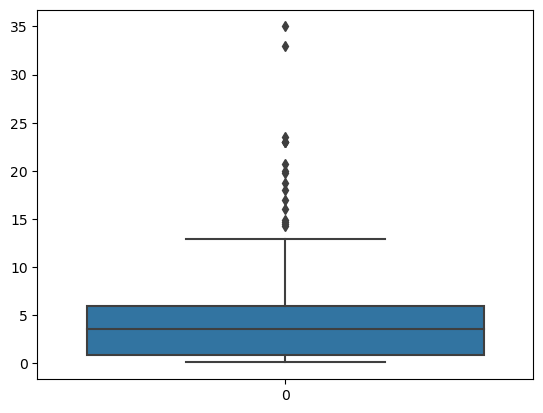

In [20]:
sns.boxplot(data['Selling_Price'])

In [21]:
sorted(data["Selling_Price"],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [22]:
data[(data["Selling_Price"]>=33.0) & (data["Selling_Price"]<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


remove above two row from the data

In [23]:
data = data[~(data["Selling_Price"]>=33.0) & (data["Selling_Price"]<=35.0)]

In [24]:
data.shape

(299, 9)

<h3>Encoding the categorical columns</h3>

In [25]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [26]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [27]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [28]:
data['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [30]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [31]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
data['Transmission'] = data['Transmission'].map({'Manual':0,'Automatic':1})

In [33]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

In [34]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


#<h3>Store Feature Matrix in X and Response(Target) in  Vector y</h3>

In [35]:
X = data.drop(['Car_Name','Selling_Price'],axis = 1) #independent variable
y = data['Selling_Price']                            #dependent variable

In [36]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

<h3>Splitting the Dataset into the training set and test set</h3>

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

<h3>Import the models</h3>

In [39]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

<h3>Model training</h3>

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb =  GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<h3>Prediction on Test Data</h3>

In [42]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)


<h3>Evaluating the Algorithm</h3>

In [43]:
from sklearn import metrics


In [44]:
score1 =  metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 =  metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [45]:
print(score1,score2,score3,score4)

0.6790884983129402 0.7447762744789255 0.8683708789017967 0.8887471822279068


In [46]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             'R2_SCORE':[score1,score2,score3,score4]})

In [47]:
final_data

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.744776
2,GBR,0.868371
3,XG,0.888747


<Axes: xlabel='Models', ylabel='R2_SCORE'>

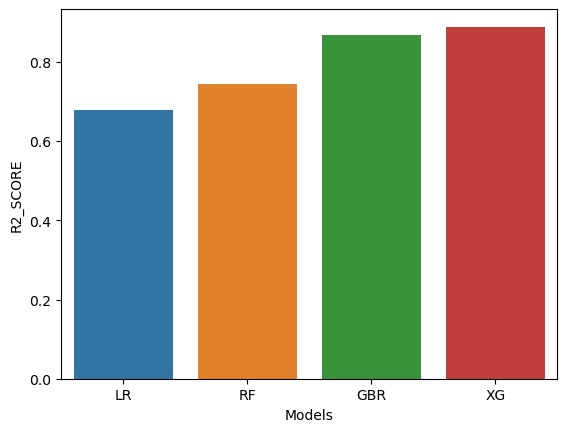

In [48]:
sns.barplot(x = final_data['Models'],y = final_data['R2_SCORE'])

<h3>Save The Model</h3>

In [59]:
xg = XGBRegressor()
xg_final = xg.fit(X,y)

In [60]:
import joblib

In [61]:
joblib.dump(xg_final,'car_price_prediction')

['car_price_prediction']

In [62]:
model = joblib.load('car_price_prediction')

<h3>Prediction on New Data</h3>

In [70]:
import pandas as pd
import streamlit as st

data_new = pd.DataFrame({
 'Present_Price':6.50,
 'Kms_Driven':30000,
 'Fuel_Type':1,
 'Seller_Type':0,
 'Transmission':0,
 'Owner':2,
 'Age':5
},index = [0])


In [71]:
model.predict(data_new)

array([5.495208], dtype=float32)

In [65]:
xg_final.save_model('model_aiml.json')